<a href="https://colab.research.google.com/github/antima123-bit/-CrackYourPlacement/blob/main/Predictingpages1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

In [9]:
# Load the data
customers = pd.read_csv("ecommerce_customers.csv")

In [35]:
# Load the CSV file using pandas
datasets = pd.read_csv('ecommerce_customers.csv')

# Explore the first few rows of the dataset
print(datasets.head())

   User ID Page URL     Timestamp  Page Visits        Age  Gender  \
0        0   page_3  1.631266e+09            3  21.464187    Male   
1        1   page_6  1.631250e+09            7  38.038534    Male   
2        2   page_4  1.631272e+09            2  27.199542  Female   
3        3   page_3  1.631210e+09            6  34.875661    Male   
4        4   page_8  1.631235e+09            4  32.212776  Female   

      Location  Session Duration Referral Source Device Type  
0  Los Angeles          2.050860            Paid      Mobile  
1      Chicago          1.243317          Direct      Tablet  
2     New York          5.280247         Organic      Mobile  
3  Los Angeles          4.224157          Direct     Desktop  
4      Chicago         13.508778            Paid      Tablet  


In [36]:
print(page_visits)

User ID   0     1     2     3     4     5     6     7     8     9     ...  \
Page URL                                                              ...   
page_0     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
page_1     NaN   NaN   NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN  ...   
page_2     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   3.0   9.0  ...   
page_3     3.0   NaN   NaN   6.0   NaN   NaN   NaN   NaN   NaN   NaN  ...   
page_4     NaN   NaN   2.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
page_5     NaN   NaN   NaN   NaN   NaN   8.0   NaN   NaN   NaN   NaN  ...   
page_6     NaN   7.0   NaN   NaN   NaN   NaN   NaN   0.0   NaN   NaN  ...   
page_7     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   
page_8     NaN   NaN   NaN   NaN   4.0   NaN   NaN   NaN   NaN   NaN  ...   
page_9     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...   

User ID   4990  4991  4992  4993  4994  4995  4996  4997  4998  4999  
Page

In [12]:
# Calculate total visits
total_visits = page_visits.sum().sum()

In [13]:
print(total_visits)

24995.0


In [14]:
# Calculate page proportions
page_proportions = page_visits / total_visits

In [15]:
print(page_proportions)

User ID      0        1        2        3        4        5        6     7     \
Page URL                                                                        
page_0        NaN      NaN      NaN      NaN      NaN      NaN      NaN   NaN   
page_1        NaN      NaN      NaN      NaN      NaN      NaN  0.00012   NaN   
page_2        NaN      NaN      NaN      NaN      NaN      NaN      NaN   NaN   
page_3    0.00012      NaN      NaN  0.00024      NaN      NaN      NaN   NaN   
page_4        NaN      NaN  0.00008      NaN      NaN      NaN      NaN   NaN   
page_5        NaN      NaN      NaN      NaN      NaN  0.00032      NaN   NaN   
page_6        NaN  0.00028      NaN      NaN      NaN      NaN      NaN   0.0   
page_7        NaN      NaN      NaN      NaN      NaN      NaN      NaN   NaN   
page_8        NaN      NaN      NaN      NaN  0.00016      NaN      NaN   NaN   
page_9        NaN      NaN      NaN      NaN      NaN      NaN      NaN   NaN   

User ID      8        9    

In [16]:
# Calculate mean page proportions
mean_page_proportions = page_proportions.mean()

In [17]:
print(mean_page_proportions)

User ID
0       0.00012
1       0.00028
2       0.00008
3       0.00024
4       0.00016
         ...   
4995    0.00016
4996    0.00012
4997    0.00036
4998    0.00016
4999    0.00032
Length: 5000, dtype: float64


In [18]:
# Sort pages by mean proportion of visits in descending order
sorted_pages = mean_page_proportions.sort_values(ascending=False)

In [19]:
print(sorted_pages)

User ID
3375    0.00064
1081    0.00056
1091    0.00052
4332    0.00052
3284    0.00052
         ...   
4508    0.00000
4524    0.00000
2556    0.00000
106     0.00000
2500    0.00000
Length: 5000, dtype: float64


In [20]:
# Select top 3 pages
top_3_pages = sorted_pages.head(3)

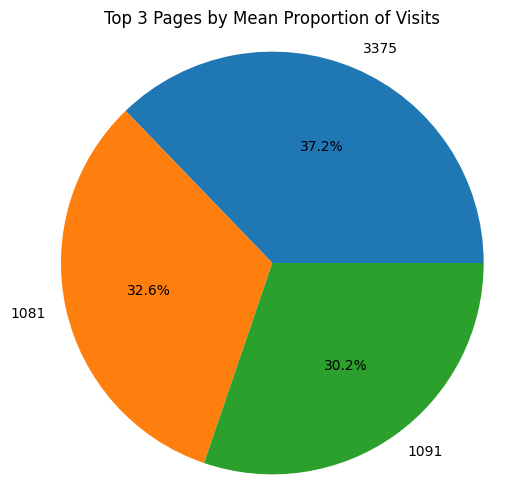

In [21]:
top_3_pages = sorted_pages.head(3)
plt.figure(figsize=(6, 6))
plt.pie(top_3_pages.values, labels=top_3_pages.index, autopct="%1.1f%%")
plt.title("Top 3 Pages by Mean Proportion of Visits")
plt.axis("equal")
plt.show()

In [22]:
print(top_3_pages)

User ID
3375    0.00064
1081    0.00056
1091    0.00052
dtype: float64


In [23]:
# Calculate proportion for "Others"
others_proportion = 1 - top_3_pages.sum()

In [24]:
print(others_proportion)

0.9982796559311863


In [25]:
# Create labels and values for the pie chart
labels = top_3_pages.index.tolist() + ["Others"]
values = top_3_pages.values.tolist() + [others_proportion]

In [26]:
print(labels)
print(values)

[3375, 1081, 1091, 'Others']
[0.000640128025605121, 0.0005601120224044809, 0.0005201040208041609, 0.9982796559311863]


In [28]:
print(sorted_pages)

User ID
3375    0.00064
1081    0.00056
1091    0.00052
4332    0.00052
3284    0.00052
         ...   
4508    0.00000
4524    0.00000
2556    0.00000
106     0.00000
2500    0.00000
Length: 5000, dtype: float64


In [29]:

# Select top 10 pages
top_10_pages = sorted_pages.head(10)

In [30]:
print(top_10_pages)

User ID
3375    0.00064
1081    0.00056
1091    0.00052
4332    0.00052
3284    0.00052
372     0.00052
2255    0.00052
4762    0.00048
3063    0.00048
2201    0.00048
dtype: float64


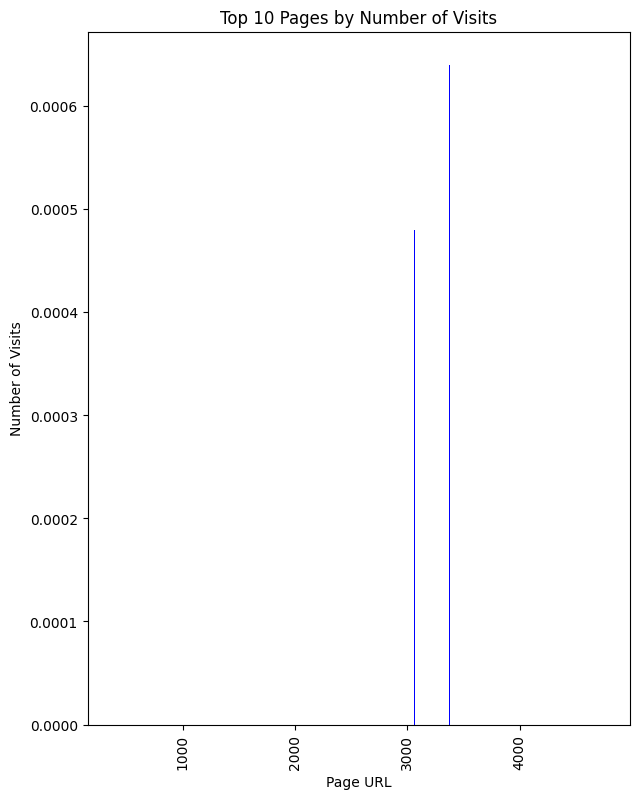

In [31]:
# Plot the bar chart
plt.figure(figsize=(7, 9))
plt.bar(top_10_pages.index, top_10_pages.values, color="blue")
plt.xlabel("Page URL")
plt.ylabel("Number of Visits")
plt.title("Top 10 Pages by Number of Visits")
plt.xticks(rotation=90)
plt.show()

In [32]:
print(customers)

      User ID Page URL     Timestamp  Page Visits        Age  Gender  \
0           0   page_3  1.631266e+09            3  21.464187    Male   
1           1   page_6  1.631250e+09            7  38.038534    Male   
2           2   page_4  1.631272e+09            2  27.199542  Female   
3           3   page_3  1.631210e+09            6  34.875661    Male   
4           4   page_8  1.631235e+09            4  32.212776  Female   
...       ...      ...           ...          ...        ...     ...   
4995     4995   page_3  1.631218e+09            4  48.054303  Female   
4996     4996   page_0  1.631250e+09            3  28.413692    Male   
4997     4997   page_6  1.631212e+09            9  44.010589  Female   
4998     4998   page_2  1.631189e+09            4  33.791105    Male   
4999     4999   page_3  1.631201e+09            8  36.059108  Female   

         Location  Session Duration Referral Source Device Type  
0     Los Angeles          2.050860            Paid      Mobile  
1  

In [33]:
# Convert the 'Gender' column to a numerical representation
customers['Gender_Numeric'] = customers['Gender'].map({'Male': 0, 'Female': 1})  # Map 'Male' to 0 and 'Female' to 1

# Calculate the correlation using the numerical Gender column
corr_matrix = customers[["Page Visits", "Age", "Gender_Numeric"]].corr()
print(corr_matrix)

                Page Visits       Age  Gender_Numeric
Page Visits        1.000000 -0.002387        0.005410
Age               -0.002387  1.000000        0.018643
Gender_Numeric     0.005410  0.018643        1.000000


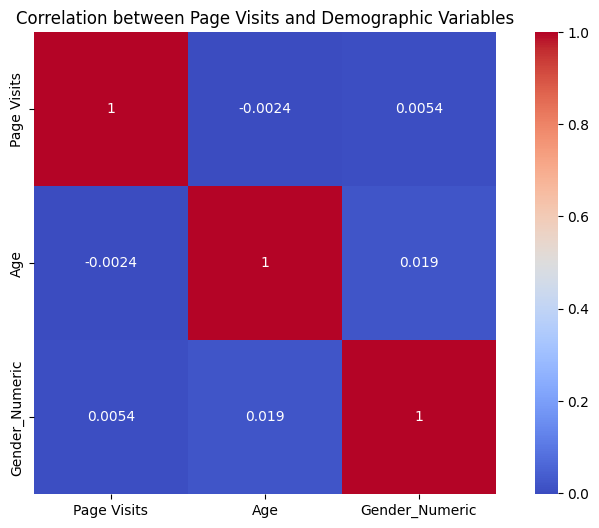

In [34]:
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", square=True)
plt.title("Correlation between Page Visits and Demographic Variables")
plt.show()

In [37]:

# Prepare the data
X = customers.drop('Page Visits', axis=1)  # features
y = customers['Page Visits']  # target variable


In [45]:
print(X)

      User ID     Timestamp        Age  Session Duration  Gender_Numeric  \
0           0  1.631266e+09  21.464187          2.050860               0   
1           1  1.631250e+09  38.038534          1.243317               0   
2           2  1.631272e+09  27.199542          5.280247               1   
3           3  1.631210e+09  34.875661          4.224157               0   
4           4  1.631235e+09  32.212776         13.508778               1   
...       ...           ...        ...               ...             ...   
4995     4995  1.631218e+09  48.054303          9.667878               1   
4996     4996  1.631250e+09  28.413692          5.987859               0   
4997     4997  1.631212e+09  44.010589          8.080392               1   
4998     4998  1.631189e+09  33.791105          8.784083               0   
4999     4999  1.631201e+09  36.059108          8.572120               1   

      Page URL_page_0  Page URL_page_1  Page URL_page_2  Page URL_page_3  \
0          

In [38]:
# Convert string columns to categorical variables
X = X.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [39]:
# Convert string columns to categorical variables
X = X.apply(lambda col: col.astype('category') if col.dtype == 'object' else col)


In [40]:
# Create dummy variables for categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include='category').columns)


In [44]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
print(X_train)

      User ID     Timestamp        Age  Session Duration  Gender_Numeric  \
4227     4227  1.631272e+09  53.563027         30.533396               1   
4676     4676  1.631220e+09  13.815633         17.353604               0   
800       800  1.631233e+09  17.173287          4.595954               0   
3671     3671  1.631190e+09  42.185035         27.698787               1   
4193     4193  1.631200e+09  27.365735          0.897675               1   
...       ...           ...        ...               ...             ...   
4426     4426  1.631254e+09  39.926987         33.645501               0   
466       466  1.631226e+09  26.093654         15.304791               0   
3092     3092  1.631246e+09  41.747849          0.768778               1   
3772     3772  1.631248e+09  25.664839          0.751986               0   
860       860  1.631255e+09  54.765450          8.775054               1   

      Page URL_page_0  Page URL_page_1  Page URL_page_2  Page URL_page_3  \
4227       

In [49]:
# Create a Linear Regression model
model = LinearRegression()


In [50]:
print(X_train)

      User ID     Timestamp        Age  Session Duration  Gender_Numeric  \
4227     4227  1.631272e+09  53.563027         30.533396               1   
4676     4676  1.631220e+09  13.815633         17.353604               0   
800       800  1.631233e+09  17.173287          4.595954               0   
3671     3671  1.631190e+09  42.185035         27.698787               1   
4193     4193  1.631200e+09  27.365735          0.897675               1   
...       ...           ...        ...               ...             ...   
4426     4426  1.631254e+09  39.926987         33.645501               0   
466       466  1.631226e+09  26.093654         15.304791               0   
3092     3092  1.631246e+09  41.747849          0.768778               1   
3772     3772  1.631248e+09  25.664839          0.751986               0   
860       860  1.631255e+09  54.765450          8.775054               1   

      Page URL_page_0  Page URL_page_1  Page URL_page_2  Page URL_page_3  \
4227       

In [51]:
# Train the model using the training data
model.fit(X_train, y_train)

LinearRegression()

In [53]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [54]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [55]:
# Evaluate the model using Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [56]:
print(y_test)

1501    4
2586    2
2653    4
1055    2
705     3
       ..
4711    1
2313    8
3214    5
2732    1
1926    4
Name: Page Visits, Length: 1000, dtype: int64


In [57]:
print(f'MSE: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


MSE: 5.07
R-squared: -0.00


In [58]:
# Print the coefficients (weights) of the Linear Regression model
print('Coefficients:')
print(model.coef_)

Coefficients:
[-1.88918610e-05 -2.11325984e-06 -8.77247181e-04 -2.07947292e-03
  3.23910454e-03 -6.94917165e-02 -1.30090632e-01  1.12154226e-01
 -6.37855663e-02 -1.71227834e-02  5.52846935e-02 -1.20034356e-02
  8.74267105e-02 -8.35889583e-02  1.21217462e-01  3.23910454e-03
 -3.23910454e-03  8.07098831e-02 -4.57971785e-02 -3.49127046e-02
 -3.89701202e-02  3.47563725e-02  4.21374765e-03  7.99635150e-02
 -3.47350866e-02 -4.52284284e-02]


In [59]:
#Print the intercept (bias) of the Linear Regression model
print(f'Intercept: {model.intercept_:.2f}')

Intercept: 3452.33
